In [1]:
 from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import cv2
import os
import numpy as np

# Define the path to the dataset
data_path = "/content/drive/My Drive/Project/images_dataset"

# Create lists to store the images and labels
train_images = []
train_labels = []
test_images = []
test_labels = []

# Loop through the dataset directory
for folder in os.listdir(data_path):
    # Get the path to the current folder
    folder_path = os.path.join(data_path, folder)
    if os.path.isdir(folder_path):
        # Loop through the subfolders
        for subfolder in os.listdir(folder_path):
            subfolder_path = os.path.join(folder_path, subfolder)
            if os.path.isdir(subfolder_path):
                label = subfolder
                # Loop through the images in the subfolder
                for file in os.listdir(subfolder_path):
                    # Get the path to the image
                    img_path = os.path.join(subfolder_path, file)
                    # Load the image using OpenCV
                    img = cv2.imread(img_path)
                    # Resize the image
                    img = cv2.resize(img, (224, 224))
                    # Convert the image to RGB
                    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                    # Split the data into train and test sets
                    if folder == "train":
                        train_images.append(img)
                        train_labels.append(label)
                    elif folder == "test":
                        test_images.append(img)
                        test_labels.append(label)
# Convert the lists to numpy arrays
train_images = np.array(train_images)
train_labels = np.array(train_labels)
test_images = np.array(test_images)
test_labels = np.array(test_labels)


In [3]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [4]:
from sklearn.preprocessing import LabelBinarizer

# Initialize the label binarizer
lb = LabelBinarizer()

# Fit and transform the train labels
train_labels = lb.fit_transform(train_labels)

# Transform the test labels
test_labels = lb.transform(test_labels)


In [5]:
from sklearn.model_selection import train_test_split

# Split the training data into train and validation sets
train_images, val_images, train_labels, val_labels = train_test_split(
    train_images, train_labels, test_size=0.2, random_state=42
)


In [6]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model

# Load the pre-trained ResNet50 model
base_model = tf.keras.applications.VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))


# Freeze the layers of the base model
base_model.trainable = False

# Add a flatten layer
x = base_model.output
x = Flatten()(x)

# Add a fully connected layer with 128 units and ReLU activation
x = Dense(128, activation="relu")(x)

# Add a final fully connected layer with a single output unit and a sigmoid activation function
output = Dense(1, activation="sigmoid")(x)

# Build the model
model = Model(inputs=base_model.input, outputs=output)

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tf.keras.metrics.AUC(curve="ROC"), tf.keras.metrics.AUC(curve="PR"),tf.keras.metrics.BinaryCrossentropy(), tf.keras.metrics.TruePositives(), tf.keras.metrics.FalsePositives(), tf.keras.metrics.TrueNegatives(), tf.keras.metrics.FalseNegatives(), tf.keras.metrics.PrecisionAtRecall(0.5), tf.keras.metrics.RecallAtPrecision(0.5), tf.keras.metrics.BinaryAccuracy(threshold=0.5), tf.keras.metrics.SensitivityAtSpecificity(0.5), tf.keras.metrics.SpecificityAtSensitivity(0.5)])


58889256/58889256 [==============================] - 0s 0us/step


In [8]:
history = model.fit(train_images, train_labels, batch_size=32, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
43/43 [==============================] - 1286s 30s/step - loss: 0.5042 - accuracy: 0.8063 - precision: 0.8333 - recall: 0.7154 - auc: 0.8778 - auc_1: 0.7949 - binary_crossentropy: 0.5042 - true_positives: 445.0000 - false_positives: 89.0000 - true_negatives: 662.0000 - false_negatives: 177.0000 - precision_at_recall: 0.8677 - recall_at_precision: 1.0000 - binary_accuracy: 0.8063 - sensitivity_at_specificity: 0.9469 - specificity_at_sensitivity: 0.9348 - val_loss: 0.7642 - val_accuracy: 0.7299 - val_precision: 0.8596 - val_recall: 0.5821 - val_auc: 0.8082 - val_auc_1: 0.8284 - val_binary_crossentropy: 0.7642 - val_true_positives: 202.0000 - val_false_positives: 33.0000 - val_true_negatives: 279.0000 - val_false_negatives: 145.0000 - val_precision_at_recall: 0.9062 - val_recall_at_precision: 1.0000 - val_binary_accuracy: 0.7299 - val_sensitivity_at_specificity: 0.8732 - val_specificity_at_sensitivity: 0.9423
Epoch 2/5
43/43 [==============================] - 1287s 30s/step - lo

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [ ]:
# Load the model
model =  tf.keras.models.load_model('/content/drive/MyDrive/Project/models/cyberbullying_model_bilstm_image.h5')

In [ ]:
# Evaluate the model on the test data
results = model.evaluate(test_images, test_labels)
print("Test Accuracy:", results[1])

# Use the model to make predictions on the test data
predictions = model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)


21/21 [==============================] - 379s 18s/step - loss: 1.9224 - accuracy: 0.7117
Test Accuracy: 0.7116843461990356
21/21 [==============================] - 364s 17s/step


In [ ]:
model.save("/content/drive/My Drive/Project/models/cyberbullying_model_CNN_image.h5")

In [ ]:
# Load the model
text_model =  tf.keras.models.load_model('/content/drive/MyDrive/Project/models/cyberbullying_model__image.h5')

OSError: ignored

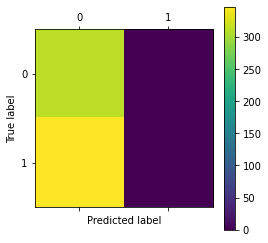

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate predictions for the test data
#predictions = model.predict(test_images)
#predicted_labels = np.argmax(predictions, axis=1)

# Generate a confusion matrix
cm = confusion_matrix(test_labels, predicted_labels)
plt.matshow(cm)
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
fig = plt.gcf()
plt.show()
plt.draw()
fig.savefig("/content/drive/My Drive/Project/Graphs/images/confusion_matrix.png",bbox_inches = 'tight',dpi=1000)

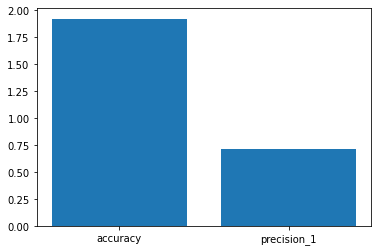

<Figure size 432x288 with 0 Axes>

In [ ]:
# Generate a barplot over accuracy and precision
metrics = ['accuracy', 'precision_1']
values = [results[0], results[1]]
plt.bar(metrics, values)
fig = plt.gcf()
plt.show()
plt.draw()
fig.savefig("/content/drive/My Drive/Project/Graphs/images/barplot_over_accuracy_and_precision.png",bbox_inches = 'tight',dpi=1000)


In [ ]:
results[0]

1.922354817390442

In [ ]:
# Generate a line plot over epochs and accuracy
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['accuracy'], 'bo', label='Training accuracy')
plt.plot(epochs, history.history['val_accuracy'], 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
fig = plt.gcf()
plt.show()
plt.draw()
fig.savefig("/content/drive/My Drive/Project/Graphs/images/line_plot_over_epochs_and_accuracy.png",bbox_inches = 'tight',dpi=1000)

NameError: ignored

In [ ]:
import matplotlib.pyplot as plt

# Get the accuracy and precision values from the training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
precision = history.history['precision_1']
val_precision = history.history['val_precision']

# Set the number of epochs
epochs = range(1, len(acc) + 1)

# Plot the accuracy and precision values for each epoch
plt.figure(figsize=(10, 5))
plt.bar(epochs, acc, label='Training accuracy')
plt.bar(epochs, val_acc, label='Validation accuracy')
plt.title('Accuracy vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
fig = plt.gcf()
plt.show()
plt.draw()
fig.savefig("/content/drive/My Drive/Project/Graphs/images/plot_accuracy_vs_epochs.png",bbox_inches = 'tight',dpi=1000)

In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(epochs, precision, label='Training precision')
plt.bar(epochs, val_precision, label='Validation precision')
plt.title('Precision vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('Precision')
plt.legend(loc='lower right')
fig = plt.gcf()
plt.show()
plt.draw()
fig.savefig("/content/drive/My Drive/Project/Graphs/images/plot_precision_vs_epochs.png",bbox_inches = 'tight',dpi=1000)

In [ ]:
#@title Ensemble model
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import ResNet50, InceptionV3, Xception
from tensorflow.keras.layers import Dense, Input, Average
from tensorflow.keras.models import Model

# Define input shape
input_shape = (224, 224, 3)

# Load the pre-trained ResNet50 model and remove the top layer
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=input_shape)
resnet_output = resnet_model.output
resnet_output = tf.keras.layers.GlobalAveragePooling2D()(resnet_output)

# Load the pre-trained InceptionV3 model and remove the top layer
inception_model = InceptionV3(weights='imagenet', include_top=False, input_shape=input_shape)
inception_output = inception_model.output
inception_output = tf.keras.layers.GlobalAveragePooling2D()(inception_output)

# Load the pre-trained Xception model and remove the top layer
xception_model = Xception(weights='imagenet', include_top=False, input_shape=input_shape)
xception_output = xception_model.output
xception_output = tf.keras.layers.GlobalAveragePooling2D()(xception_output)

# Define input layer
input_layer = Input(shape=input_shape)

# Connect the input to the outputs of the ResNet50, InceptionV3, and Xception models
resnet_output = resnet_model(input_layer)
inception_output = inception_model(input_layer)
xception_output = xception_model(input_layer)

# Average the outputs
output_layer = Average()([resnet_output, inception_output, xception_output])

# Add a final fully connected layer with a single output unit and a sigmoid activation function
output_layer = Dense(1, activation='sigmoid')(output_layer)

# Create the model
Enmodel = Model(inputs=input_layer, outputs=output_layer)

# Compile the model
Enmodel.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
Enmodel.fit(train_images, train_labels, batch_size=32, epochs=10, validation_data=(test_images, test_labels))

# Evaluate the model on the test data
results = Enmodel.evaluate(test_images, test_labels)
print("Test Accuracy:", results[1])

# Use the model to make predictions on the test data
predictions = Enmodel.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)


In [ ]:
Enmodel.save("/content/drive/My Drive/Project/models/cyberbullying_Ensemble_model.h5")